In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

In [145]:
pd.options.display.max_rows = 100

# load data
with open("songs_db.json") as f:
    songs_db = json.load(f)

print(f"Data was updated on {songs_db['latest_ts']}")
print("Dict keys=", list(songs_db.keys()))

Data was updated on 2018-02-13T11:36:36+0000
Dict keys= ['songs_dic', 'broken_ts_list', 'latest_ts']


In [146]:
# create datafram
df = pd.DataFrame.from_dict(songs_db['songs_dic'], orient='index')
df.reset_index(level=0, inplace=True)
df.columns = ['time','name']
df['time'] = pd.to_datetime(df.time)

df.tail()

,time,name
732744,2018-02-13 11:56:16,Sayonara Ponytail - Amai Kanshou (Galileo Gali...
732745,2018-02-13 11:52:18,She - And Beyond
732746,2018-02-13 11:50:08,SOPHIA - Boku wa Koko ni Iru
732747,2018-02-13 11:45:34,LiSA - AxxxiS
732748,2018-02-13 11:41:08,Does - Yumemiru Sekai


### Time stats

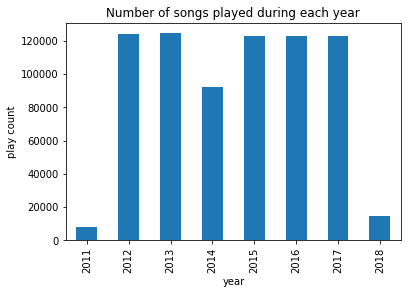

In [3]:
counts = df.groupby(df.time.dt.year).count()
ax = counts.plot(y='name', kind='bar', legend=False)
ax.set_title('Number of songs played during each year')
_ = ax.set(xlabel="year", ylabel="play count")


### Top songs

In [4]:
songs = df.name.value_counts().rename_axis('song_name').reset_index(name='play counts')

print(f'A total of {len(songs)} unique songs have been played on r/a/dio')

songs.head(25)

A total of 84122 unique songs have been played on r/a/dio


,song_name,play counts
0,FLOW - COLORS,669
1,Supercell - Feel so good,508
2,Seira Kagami - Super Special,393
3,#comiket - trainroll,367
4,Sporty-O feat. Akemi Homura - I want my UNTZ back,333
5,Carlito - GO! GO! CARLITO!,333
6,Supercell - LOVE & ROLL,327
7,supercell - My Dearest,327
8,JIMANG - la divina tragedia ~Makyoku~,320
9,Pearl Kyoudai - Youkoso! Hitori Bocchi,315


In [5]:
print('Some play count stats')
songs.describe()

Some play count stats


,play counts
count,84122.000000
mean,8.710551
std,20.979250
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,669.000000


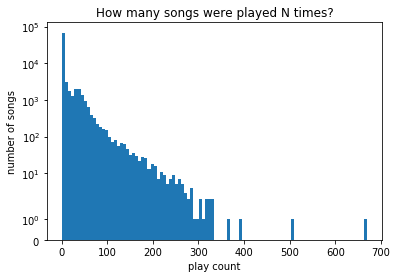

In [6]:
ax = plt.subplot()
ax.set_yscale('symlog')
ax.hist(songs['play counts'], bins=100)
ax.set_ylabel('number of songs')
ax.set_title('How many songs were played N times?')
_ = ax.set_xlabel('play count')

In [53]:
grouped = df.groupby('name')

time_stats = grouped.time.agg(['min', 'max', 'count'])
time_stats['dif'] = time_stats['max'] - time_stats['min']
time_stats['freq'] = time_stats['dif'] / time_stats['count']
time_stats.columns = ['First played', 'Last played', 'count', 'dif', 'freq']

Most frequently played songs with count > 20 and difference between the first \
and the last plays > 7 days to remove outliers

In [70]:
time_stats[(time_stats['count'] > 20) & (time_stats['dif'] > pd.Timedelta(7, 'D'))].sort_values('freq').head(10)

,First played,Last played,count,dif,freq
name,,,,,
どうぶつビスケッツ×PPP - ようこそジャパリパークへ,2017-03-06 00:04:05,2018-02-12 05:26:56,123,343 days 05:22:51,2 days 18:58:14.073170
Iguchi Yuka - Platinum Disco ~TV Size~,2012-04-02 00:22:15,2012-07-18 02:46:44,33,107 days 02:24:29,3 days 05:53:28.151515
FLOW - COLORS,2012-01-08 22:54:06,2018-02-12 05:59:59,669,2226 days 07:05:53,3 days 07:52:01.603886
Yakushimaru Etsuko & Metro Orchestra - Nornir,2012-01-12 08:13:19,2012-08-18 16:57:39,65,219 days 08:44:20,3 days 08:59:45.538461
ろん & Gero - PONPONPON,2012-01-26 19:10:10,2013-03-04 05:38:51,115,402 days 10:28:41,3 days 11:59:12.356521
ろん - PONPONPON,2012-01-20 21:26:14,2013-01-06 21:09:35,95,351 days 23:43:21,3 days 16:55:24.221052
Detroit Metal City - Death Penis,2011-12-28 12:43:55,2012-03-31 14:50:55,24,94 days 02:07:00,3 days 22:05:17.500000
Bad Apple!!,2012-01-14 05:43:01,2012-09-14 07:46:43,59,244 days 02:03:42,4 days 03:17:21.050847
MAN WITH A MISSION - My Hero,2017-11-02 22:47:58,2018-02-06 21:13:07,23,95 days 22:25:09,4 days 04:06:18.652173


Colors have been played since 2012 every 3 days...

In [56]:
print('Most infrequently played with play count > 1')
time_stats.sort_values('freq', ascending=False).head(10)

Most infrequently played with play count > 1


,First played,Last played,count,dif,freq
name,,,,,
Tokyo Brass Style - 21st Century Girls,2011-11-11 10:44:51,2018-02-04 02:20:18,2,2276 days 15:35:27,1138 days 07:47:43.500000
NUMBER 201 - Lorelei,2011-11-20 05:23:57,2018-02-04 10:47:39,2,2268 days 05:23:42,1134 days 02:41:51
Nujabes - Summer Gypsy,2011-12-03 17:00:38,2018-02-07 23:21:33,2,2258 days 06:20:55,1129 days 03:10:27.500000
Kawada Mami - See visionS,2011-11-21 00:34:46,2018-01-20 01:31:08,2,2252 days 00:56:22,1126 days 00:28:11
Aya Hirano - God Knows,2011-12-09 16:59:21,2018-01-27 02:10:17,2,2240 days 09:10:56,1120 days 04:35:28
Blazo - Clever Red,2011-12-19 01:01:40,2018-02-04 04:08:32,2,2239 days 03:06:52,1119 days 13:33:26
イワクラコマキ - narciso,2011-11-22 07:09:48,2017-12-12 01:39:22,2,2211 days 18:29:34,1105 days 21:14:47
イワクラコマキ - voyage Gothic Bold,2011-11-22 07:35:40,2017-12-12 00:41:46,2,2211 days 17:06:06,1105 days 20:33:03
gatou - In The Shade,2011-11-22 19:48:36,2017-12-12 00:49:55,2,2211 days 05:01:19,1105 days 14:30:39.500000


New songs by year

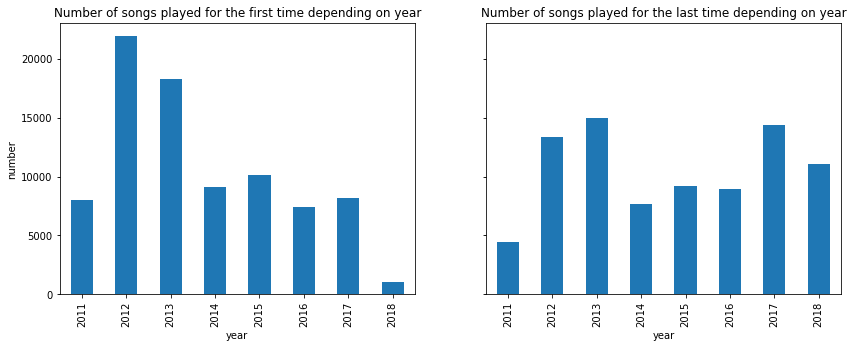

In [69]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

counts = time_stats.groupby(time_stats['First played'].dt.year).count()
ax = counts.plot(y='count', kind='bar', legend=False, ax=ax1)
ax.set_title('Number of songs played for the first time depending on year')
_ = ax.set(xlabel="year", ylabel="number")

counts = time_stats.groupby(time_stats['Last played'].dt.year).count()
ax = counts.plot(y='count', kind='bar', legend=False, ax=ax2)
ax.set_title('Number of songs played for the last time depending on year')
_ = ax.set(xlabel="year", ylabel="number")


It seems each year about ~10000 new songs are added and similar number is retired

### song trends

In [188]:
min_play_count = 50
print(f"Identify trends (becomes more/less popular with time) for songs with play count > {min_play_count}")
print(f"There are {len(songs[songs['play counts'] > min_play_count])} such songs")

Identify trends (becomes more/less popular with time) for songs with play count > 50
There are 3357 such songs


In [197]:
begin = df.time.min()
end = df.time.max()
dates_range = pd.date_range(start=begin, end=end, freq='7D')

trends_df = []

for song_name in tqdm(songs[songs['play counts'] > min_play_count].song_name):
    tmpdf = df[df.name==song_name].set_index('time')
    counts = tmpdf.groupby(pd.cut(tmpdf.index, dates_range)).count()
    trend = np.corrcoef(np.arange(len(counts)), counts.name)[0,1]
    trends_df.append((song_name, trend))
    
trends_df = pd.DataFrame(trends_df, columns=['name', 'trend'])
trends_df.sort_values('trend', ascending=False, inplace=True)


100%|██████████| 3357/3357 [03:59<00:00, 14.05it/s]


Songs on the rise


,name,trend
242,MAN WITH A MISSION - Raise your flag,0.608329
19,Kaneda Tomoko - Ganbara,0.596874
13,アフィリア・サーガ - ネプチューヌ☆サガして,0.593907
176,Manuel - Gas Gas Gas,0.577063
235,BRADIO - Flyers,0.558439


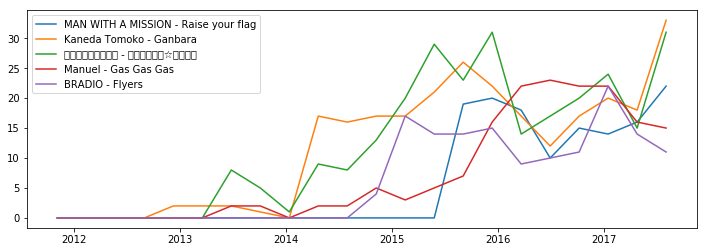

In [215]:
print('Songs on the rise')

extended_range = pd.date_range(start=begin, end=end, freq='100D')
plt.figure(figsize=(12, 4))
for song_name in trends_df.name[:5]:
    tmpdf = df[df.name==song_name].set_index('time')
    counts = tmpdf.groupby(pd.cut(tmpdf.index, extended_range)).count()
    plt.plot(extended_range[:-1], counts.name, label=song_name)
plt.legend()

trends_df.head()


Songs on the decline


,name,trend
469,Yui Horie - Sugar Sweet Nightmare,-0.515089
362,"Yui Horie, Yukari Tamura - Nano Desu",-0.530255
250,boa - Duvet,-0.543946
701,Kugimiya Rie & Kitamura Eri & Horie Yui - Pre-...,-0.567800
520,Chiwa Saitou - staple stable,-0.586794


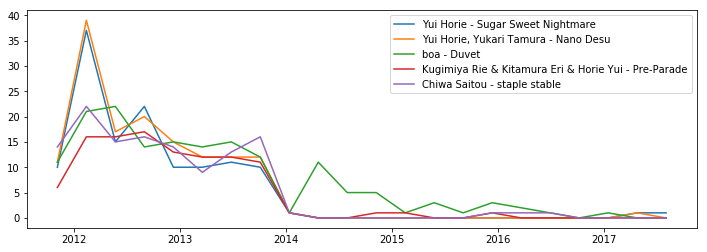

In [216]:
print('Songs on the decline')

extended_range = pd.date_range(start=begin, end=end, freq='100D')
plt.figure(figsize=(12, 4))
for song_name in trends_df.name[-5:]:
    tmpdf = df[df.name==song_name].set_index('time')
    counts = tmpdf.groupby(pd.cut(tmpdf.index, extended_range)).count()
    plt.plot(extended_range[:-1], counts.name, label=song_name)
plt.legend()

trends_df.tail()


Almost constant interest


,name,trend
346,Hirano Aya - Pizzzzzzza !!!!!!!,0.000000
1729,Shiro Sagisu - Kanon D-dur (Quartet),-0.000072
2200,Spyair - Last Moment,0.000077
1105,T.M.Revolution - INVOKE,-0.000131
1700,T.M.Revolution - Ignited,-0.000148


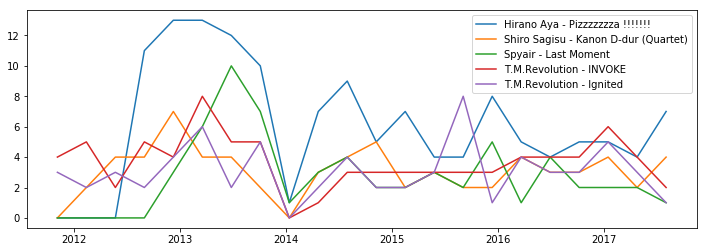

In [223]:
print('Almost constant interest')
const_int = trends_df.iloc[np.argsort(np.abs(trends_df.trend))]

plt.figure(figsize=(12, 4))
for song_name in const_int.name[:5]:
    tmpdf = df[df.name==song_name].set_index('time')
    counts = tmpdf.groupby(pd.cut(tmpdf.index, extended_range)).count()
    plt.plot(extended_range[:-1], counts.name, label=song_name)
plt.legend()

const_int.head()


### Top artists

In [8]:
artists_series = df.name.str.split('-').apply(lambda x: x[0])
artists = artists_series.value_counts().rename_axis('artist_name').reset_index(name='play counts')

print(f'A total of {len(artists)} unique artists have been played on r/a/dio')

artists.head(25)

A total of 28024 unique artists have been played on r/a/dio


,artist_name,play counts
0,Hatsune Miku,4645
1,3L,3652
2,Kalafina,3366
3,IOSYS,2852
4,Yuki Kajiura,2787
5,Shoji Meguro,2743
6,JAM Project,2653
7,Megurine Luka,2630
8,Itou Kanako,2606
9,Demetori,2602


In [9]:
artists.describe()

,play counts
count,28024.000000
mean,26.147195
std,113.209238
min,1.000000
25%,1.000000
50%,2.000000
75%,12.000000
max,4645.000000


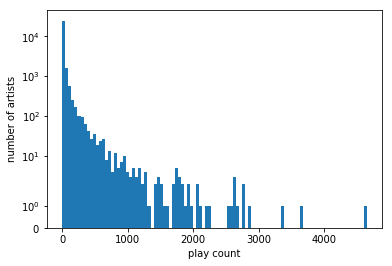

In [10]:
ax = plt.subplot()
ax.set_yscale('symlog')
ax.hist(artists['play counts'], bins=100)
ax.set_ylabel('number of artists')
_ = ax.set_xlabel('play count')